Image Segmentation Using K-means and DBSCAN.


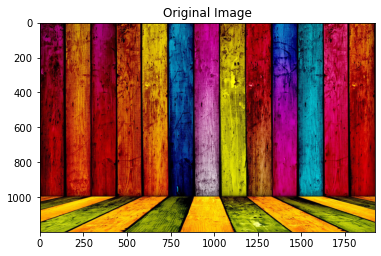
K-means and DBSCAN are clustering algorithms, which we apply for color segmentation in images.
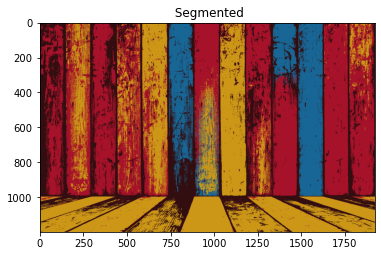
K-means tries to find a color representatives for a number of classes given, i.e., most average color for each class, which is most similar to the colors within the class but as different as possible from colors in other classes.

DBSCAN is so called density-based clustering algorithm, which tries to group similar colors into different classes based on how densely they are positioned together.

Dependencies
   All packages/libraries should be included in Python 3.6.8
   
Format
   k-means and dbscan use following format string (string of 3 dimensional array of size [x,y,n]):
   
    [[[n0,n1,n2,...],[n0,n1,n2,...]],[[n0,n1,n2,...],[n0,n1,n2,...]],...]

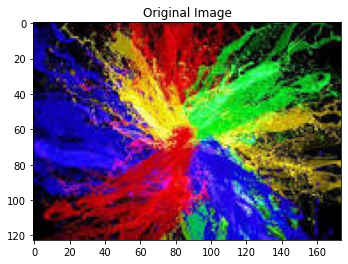

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import clustering_algorithms

# Load an image:
image_path = "C:\\Users\\cecil\\OneDrive\\Desktop\\Moodle\\FDD\\pr01-template-python-jupyter\\Images\\rgb.jpg"
image = Image.open(image_path)
pixels = image.load()
width, height = image.size

# Display image in notebook:
%matplotlib inline
plt.title('Original Image')
plt.imshow(np.asarray(image))


In [2]:
#Map pixel values to vectors
vector_list = []
for y in range(height):
    vector_list.append([])
    for x in range(width):
        vector_list[y].append(list(pixels[x,y]))

print('Image file with dimensions {}x{} pixels turned into {} vectors.'.format(width, height, len(vector_list)))

Image file with dimensions 174x123 pixels turned into 123 vectors.


In [5]:
# Perform clustering on the vectors:
dbscan_clusters = clustering_algorithms.dbscan(vector_list, minpts=100, epsilon=100)
kmeans_clusters = clustering_algorithms.kmeans(vector_list, 4)

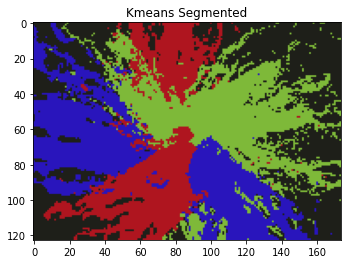

In [8]:
#reads vector array and generates an image
def createImage(vectors: list):
    modelLen = len(vectors[0][0])
    #Check supported model and initialize image
    if modelLen == 3:
        image = Image.new('RGB', (len(vectors[0]),len(vectors)))
    elif modelLen == 4:
        image = Image.new('RGBA', (len(vectors[0]),len(vectors)))
    else:
        print("Unsupported model")
        sys.exit(1)

    #Map array values to image and save
    pixel = image.load()
    for y in range(len(vectors)):
        for x in range(len(vectors[0])):
            r = int(round(vectors[y][x][0]))
            g = int(round(vectors[y][x][1]))
            b = int(round(vectors[y][x][2]))
            if modelLen == 3:
                pixel[x,y] = (r,g,b)
            elif modelLen == 4:
                a = int(round(vectors[y][x][3]))
                pixel[x,y] = (r,g,b,a)        
    return image


# Display the clustered image:
def Display(Image,Alg):
    %matplotlib inline
    plt.title(Alg+' Segmented')
    plt.imshow(np.asarray(Image))
#Kmeans Image
Display(createImage(kmeans_clusters),"Kmeans")


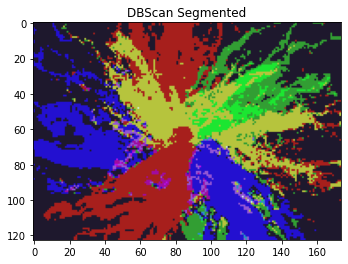

In [9]:
#DBScan Image
Display(createImage(dbscan_clusters),"DBScan")